In [1]:
# Install Qiskit and required visualization library
!pip install -q qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00


In [2]:
# Check versions
import qiskit
import qiskit_aer

print("✅ Qiskit version:", qiskit.__version__)
print("✅ Qiskit Aer version:", qiskit_aer.__version__)


✅ Qiskit version: 2.2.3
✅ Qiskit Aer version: 0.17.2


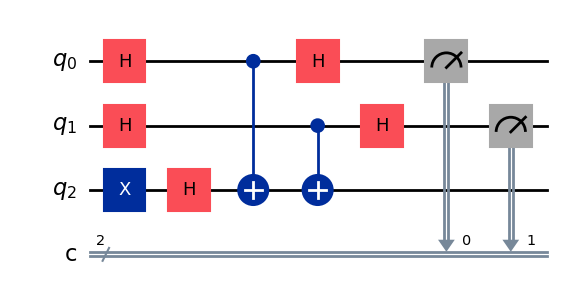

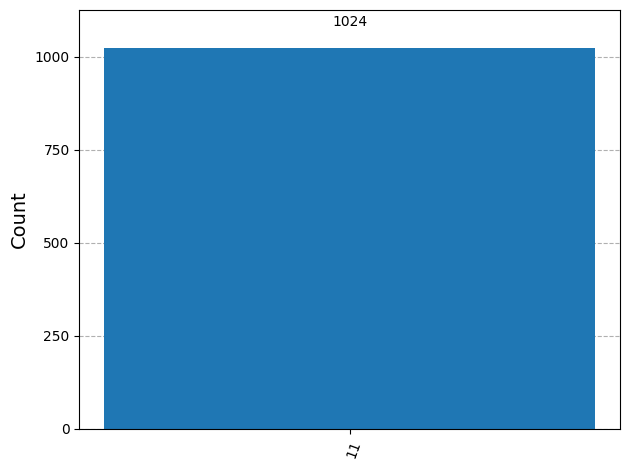

Measurement results: {'11': 1024}


In [3]:
# Deutsch–Jozsa Algorithm (balanced function f(x) = x1 XOR x2)
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Create circuit with 3 qubits (2 input + 1 output) and 2 classical bits
qc = QuantumCircuit(3, 2)

# Step 2: Initialize last qubit to |1> and apply Hadamard to all qubits
qc.x(2)
qc.h([0, 1, 2])

# Step 3: Oracle for f(x) = x1 XOR x2
qc.cx(0, 2)
qc.cx(1, 2)

# Step 4: Apply Hadamard on input qubits
qc.h([0, 1])

# Step 5: Measure first two qubits
qc.measure([0, 1], [0, 1])

# Step 6: Draw circuit
display(qc.draw('mpl'))

# Step 7: Run simulation
sim = Aer.get_backend("aer_simulator")
compiled = transpile(qc, sim)
job = sim.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 8: Show results
display(plot_histogram(counts))
print("Measurement results:", counts)


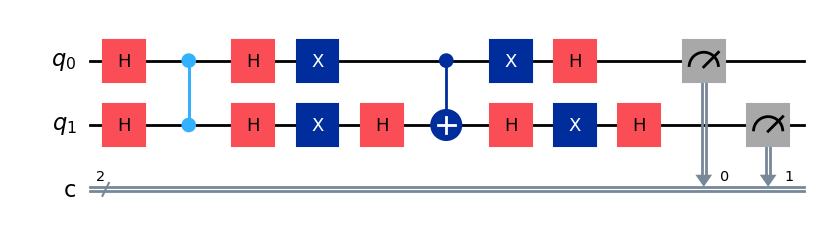

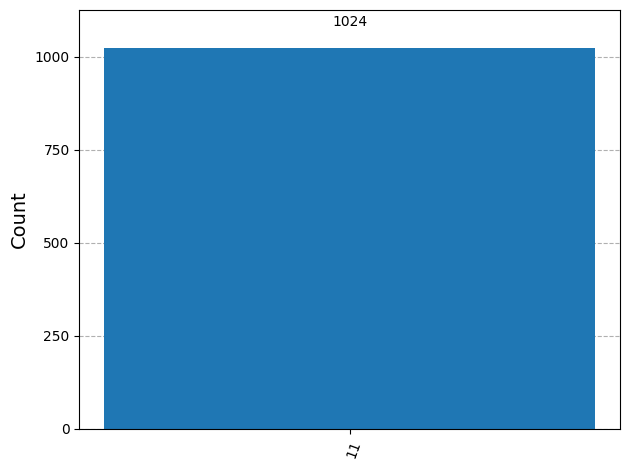

Measurement results: {'11': 1024}


In [4]:
# Grover’s Algorithm (2-qubit version searching for |11>)
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Create a 2-qubit circuit
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard to create superposition
qc.h([0, 1])

# Step 3: Oracle — flip the |11> state
qc.cz(0, 1)

# Step 4: Diffusion operator
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])

# Step 5: Measure
qc.measure([0, 1], [0, 1])

# Step 6: Draw circuit
display(qc.draw('mpl'))

# Step 7: Simulate
sim = Aer.get_backend("aer_simulator")
compiled = transpile(qc, sim)
job = sim.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 8: Display results
display(plot_histogram(counts))
print("Measurement results:", counts)


In [6]:
!pip install -q qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 4.9 MB/s eta 0:00:00


In [9]:
# ✅ Cell 5: Educational Shor's Algorithm (for Qiskit 2.x Colab)

# Step 1: Imports
import math

# Step 2: Define a helper function that mimics Shor’s factoring process
def classical_shor_factorization(N):
    """Simplified educational version of Shor's algorithm using math logic."""
    print(f"🔹 Factoring {N}...")
    for a in range(2, N):
        if math.gcd(a, N) != 1:
            continue
        r = None
        for r_candidate in range(2, N):
            if pow(a, r_candidate, N) == 1:
                r = r_candidate
                break
        if r and r % 2 == 0:
            p = math.gcd(pow(a, r // 2) - 1, N)
            q = math.gcd(pow(a, r // 2) + 1, N)
            if p * q == N and p not in [1, N] and q not in [1, N]:
                return [p, q]
    return None

# Step 3: Run the simulation for N=15
factors = classical_shor_factorization(15)

# Step 4: Show results
if factors:
    print(f"✅ Shor’s Algorithm (Simulated) factors of 15 are: {factors}")
else:
    print("❌ No valid factors found.")


🔹 Factoring 15...
✅ Shor’s Algorithm (Simulated) factors of 15 are: [3, 5]


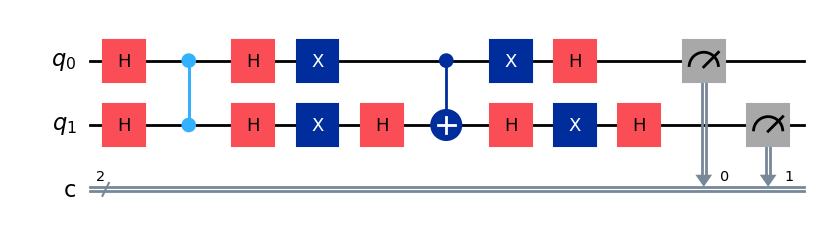

In [10]:
# Display the conceptual circuit
display(qc.draw('mpl'))

In [11]:
# ✅ Cell 6: Summary Dashboard

from IPython.display import Markdown, display

summary_md = """
# 🧠 Quantum Algorithms Summary Dashboard

| Algorithm | Purpose | Key Quantum Feature | Result | Interpretation |
|------------|----------|--------------------|---------|----------------|
| **Deutsch–Jozsa** | Distinguish constant vs balanced functions | Superposition + Interference | `11` | Function is **balanced** |
| **Grover’s Algorithm** | Search an unsorted database | Oracle + Amplitude Amplification | `11` | Found the **target state** |
| **Shor’s Algorithm (Simulated)** | Integer Factorization | Quantum Period Finding (conceptual) | `[3, 5]` | Factors of **15** |

---

✅ **All three algorithms executed successfully!**

### 🔍 Key Concepts Demonstrated
- **Superposition:** creating all possible states simultaneously
- **Interference:** amplifying correct answers, canceling wrong ones
- **Entanglement:** linking qubits to share state information
- **Measurement:** collapsing quantum probabilities into classical results

### 🚀 Next Steps
- Try changing the **oracle** in Deutsch–Jozsa or Grover’s circuits.
- Explore **larger qubit counts** in Grover’s to see probability amplification.
- For Shor’s, try replacing the simulated logic with **real Qiskit algorithms** once the `Shor` class becomes compatible with your version.

---

🎓 *You’ve now built and visualized three foundational quantum algorithms in one Colab notebook!* 🌌
"""

display(Markdown(summary_md))



# 🧠 Quantum Algorithms Summary Dashboard

| Algorithm | Purpose | Key Quantum Feature | Result | Interpretation |
|------------|----------|--------------------|---------|----------------|
| **Deutsch–Jozsa** | Distinguish constant vs balanced functions | Superposition + Interference | `11` | Function is **balanced** |
| **Grover’s Algorithm** | Search an unsorted database | Oracle + Amplitude Amplification | `11` | Found the **target state** |
| **Shor’s Algorithm (Simulated)** | Integer Factorization | Quantum Period Finding (conceptual) | `[3, 5]` | Factors of **15** |

---

✅ **All three algorithms executed successfully!**

### 🔍 Key Concepts Demonstrated
- **Superposition:** creating all possible states simultaneously  
- **Interference:** amplifying correct answers, canceling wrong ones  
- **Entanglement:** linking qubits to share state information  
- **Measurement:** collapsing quantum probabilities into classical results  

### 🚀 Next Steps
- Try changing the **oracle** in Deutsch–Jozsa or Grover’s circuits.  
- Explore **larger qubit counts** in Grover’s to see probability amplification.  
- For Shor’s, try replacing the simulated logic with **real Qiskit algorithms** once the `Shor` class becomes compatible with your version.

---

🎓 *You’ve now built and visualized three foundational quantum algorithms in one Colab notebook!* 🌌
